# Imports

In [1]:
import sys
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.multitest as smt

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)
import sexToBinary as sb
import wScore
import boxPlot as bp

# Set Directory Paths

In [3]:
# Directory path to load formatted Layer Data
%store -r layer_dataDir

# Directory path to save Calcualted Analysis Data
%store -r layer_CalData

# Directory path to save Figures
%store -r layer_Fig

# Loading

## Loading Formatted Layer Neuron Data (NeuN)

### HC

In [4]:
# NeuN_HC
with open(os.path.join(layer_dataDir, 'NeuN_HC.pkl'), 'rb') as f:
    NeuN_HC = pickle.load(f)
f.close()

# NeuN_HC_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_L.pkl'), 'rb') as f:
    NeuN_HC_L = pickle.load(f)
f.close()

# NeuN_HC_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_R.pkl'), 'rb') as f:
    NeuN_HC_R = pickle.load(f)
f.close()

# NeuN_HC_w
with open(os.path.join(layer_dataDir, 'NeuN_HC_w.pkl'), 'rb') as f:
    NeuN_HC_w = pickle.load(f)
f.close()

# NeuN_HC_w_L
with open(os.path.join(layer_dataDir, 'NeuN_HC_w_L.pkl'), 'rb') as f:
    NeuN_HC_w_L = pickle.load(f)
f.close()

# NeuN_HC_w_R
with open(os.path.join(layer_dataDir, 'NeuN_HC_w_R.pkl'), 'rb') as f:
    NeuN_HC_w_R = pickle.load(f)
f.close()

### Tau

In [5]:
# NeuN_Tau
with open(os.path.join(layer_dataDir, 'NeuN_Tau.pkl'), 'rb') as f:
    NeuN_Tau = pickle.load(f)
f.close()

# NeuN_Tau_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_L.pkl'), 'rb') as f:
    NeuN_Tau_L = pickle.load(f)
f.close()

# NeuN_Tau_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_R.pkl'), 'rb') as f:
    NeuN_Tau_R = pickle.load(f)
f.close()

# NeuN_Tau_w
with open(os.path.join(layer_dataDir, 'NeuN_Tau_w.pkl'), 'rb') as f:
    NeuN_Tau_w = pickle.load(f)
f.close()

# NeuN_Tau_w_L
with open(os.path.join(layer_dataDir, 'NeuN_Tau_w_L.pkl'), 'rb') as f:
    NeuN_Tau_w_L = pickle.load(f)
f.close()

# NeuN_Tau_w_R
with open(os.path.join(layer_dataDir, 'NeuN_Tau_w_R.pkl'), 'rb') as f:
    NeuN_Tau_w_R = pickle.load(f)
f.close()

### TDP

In [6]:
# NeuN_TDP
with open(os.path.join(layer_dataDir, 'NeuN_TDP.pkl'), 'rb') as f:
    NeuN_TDP = pickle.load(f)
f.close()

# NeuN_TDP_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_L.pkl'), 'rb') as f:
    NeuN_TDP_L = pickle.load(f)
f.close()

# NeuN_TDP_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_R.pkl'), 'rb') as f:
    NeuN_TDP_R = pickle.load(f)
f.close()

# NeuN_TDP_w
with open(os.path.join(layer_dataDir, 'NeuN_TDP_w.pkl'), 'rb') as f:
    NeuN_TDP_w = pickle.load(f)
f.close()

# NeuN_TDP_w_L
with open(os.path.join(layer_dataDir, 'NeuN_TDP_w_L.pkl'), 'rb') as f:
    NeuN_TDP_w_L = pickle.load(f)
f.close()

# NeuN_TDP_w_R
with open(os.path.join(layer_dataDir, 'NeuN_TDP_w_R.pkl'), 'rb') as f:
    NeuN_TDP_w_R = pickle.load(f)
f.close()

# Box/Scatter Plot of HC, Tau, TDP [NeuN] - ORIGINAL

In [7]:
def dist_boxplot(data, labels, min_val, max_val, title, x_label, y_label):
    # Reorder the data and labels (group by regions L, R)
    new_order = [i//2 if i % 2 == 0 else (i//2) + 6 for i in range(12)]
    reordered_data = data[:, new_order]
    reordered_labels = [labels[i] for i in new_order]
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Create boxplots for each column
    boxplot = sns.boxplot(data=reordered_data, width=0.5, ax=ax, fliersize=0, boxprops=dict(alpha=.3))

    # Add individual data points with aligned x-values
    for i, col_data in enumerate(reordered_data.T):
        jitter = np.random.normal(0, 0.1, size=len(col_data))  # Add jitter for better visualization
        x = np.full_like(col_data, i) + jitter
        ax.scatter(x, col_data, alpha=0.5, color='blue', s=5)

     # Add vertical lines every two columns
    for i in range(1, 10, 2):
        ax.axvline(x=i + 0.5, color='grey', linestyle='--', lw=0.5)
        
    # Set x-axis labels
    ax.set_xticks(np.arange(0, 12))
    ax.set_xticklabels(reordered_labels, rotation=45, ha='right')  # Use NeuN_Labels as x-axis labels

    # Set y-axis limits (replace these values with your desired limits)
    y_min_limit = min_val  # Minimum limit
    y_max_limit = max_val  # Maximum limit
    ax.set_ylim(y_min_limit, y_max_limit)

    # Set plot title and labels
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [8]:
# Labels for x-axis
NeuN_Labels = ['L23_1(Cingulate)', 'L23_2(Cingulate)', 'L23_3d(Paracingulate)', 'L23_3v(Paracingulate)',  'L23_4(Rectus)',
               'L23_5(Middle Frontal)', 'L56_1(Cingulate)', 'L56_2(Cingulate)', 'L56_3d(Paracingulate)', 'L56_3v(Paracingulate)',
               'L56_4(Rectus)', 'L56_5(Middle Frontal)']

In [9]:
# min max
all_values = np.concatenate([NeuN_HC.flatten(), NeuN_Tau.flatten(), NeuN_TDP.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_LR = min_val - buffer
max_LR = max_val + buffer

# min max
all_values = np.concatenate([NeuN_HC_L.flatten(), NeuN_Tau_L.flatten(), NeuN_TDP_L.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_L = min_val - buffer
max_L = max_val + buffer

# min max
all_values = np.concatenate([NeuN_HC_R.flatten(), NeuN_Tau_R.flatten(), NeuN_TDP_R.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_R = min_val - buffer
max_R = max_val + buffer

## L+R Mean

### HC

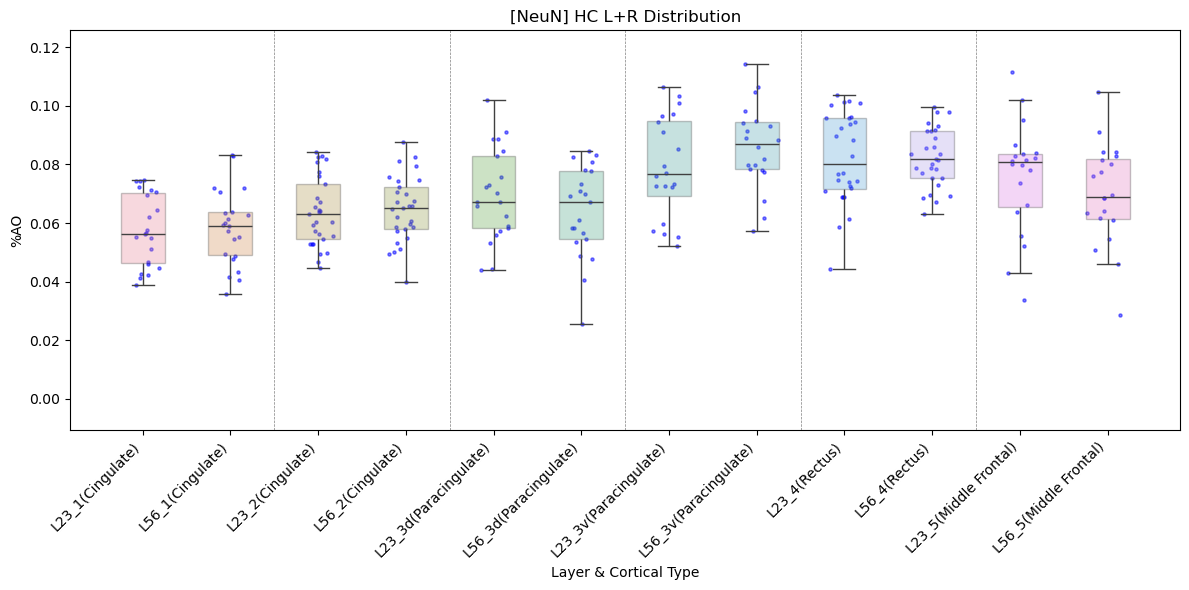

In [10]:
dist_boxplot(NeuN_HC, NeuN_Labels, min_LR, max_LR, '[NeuN] HC L+R Distribution', 'Layer & Cortical Type', '%AO')

### TAU

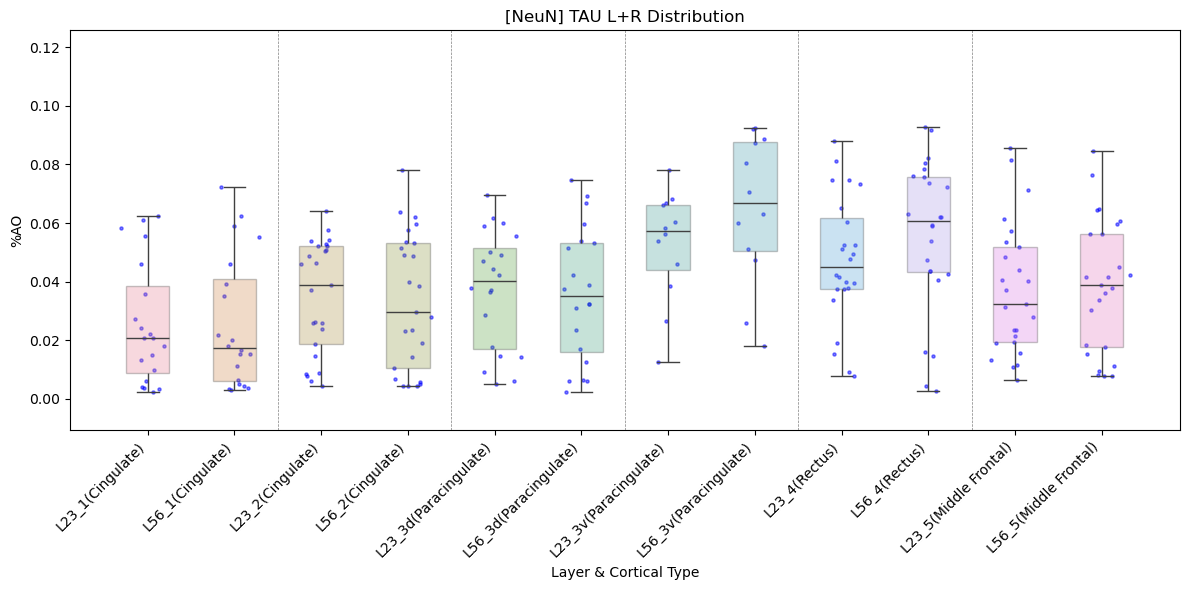

In [11]:
dist_boxplot(NeuN_Tau, NeuN_Labels, min_LR, max_LR, '[NeuN] TAU L+R Distribution', 'Layer & Cortical Type', '%AO')

### TDP

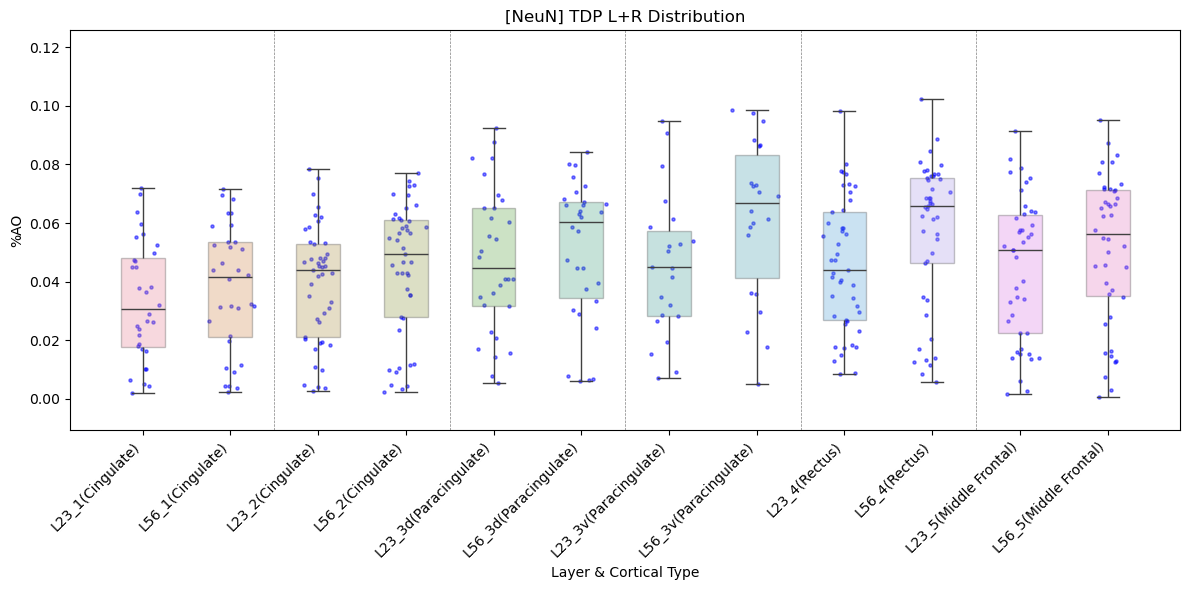

In [12]:
dist_boxplot(NeuN_TDP, NeuN_Labels, min_LR, max_LR, '[NeuN] TDP L+R Distribution', 'Layer & Cortical Type', '%AO')

## LEFT

### HC

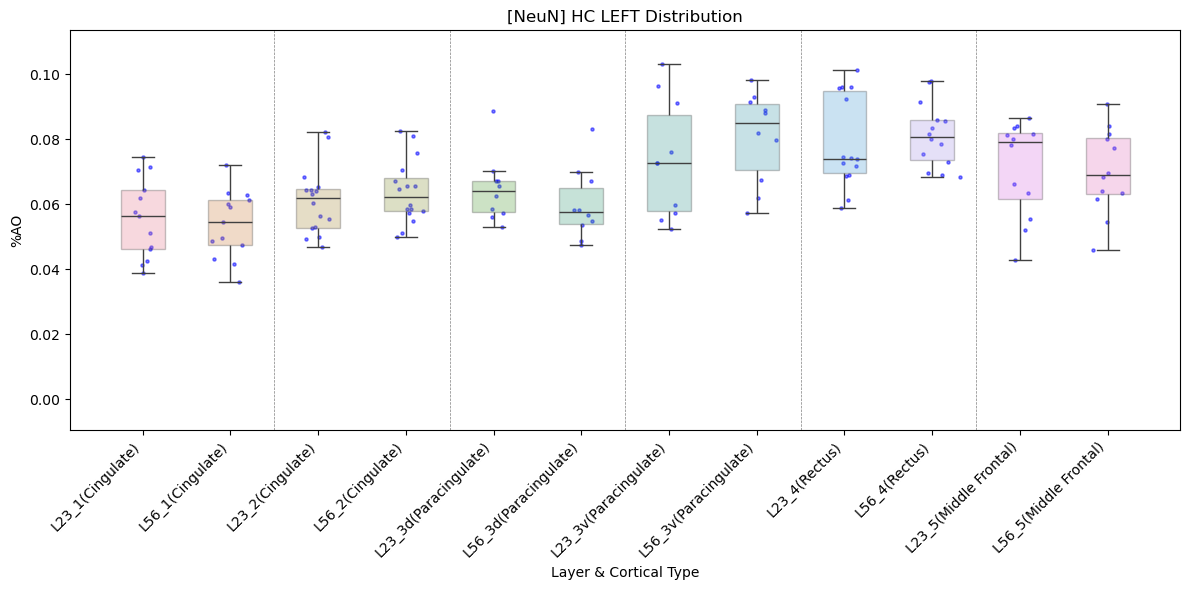

In [13]:
dist_boxplot(NeuN_HC_L, NeuN_Labels, min_L, max_L, '[NeuN] HC LEFT Distribution', 'Layer & Cortical Type', '%AO')

### TAU

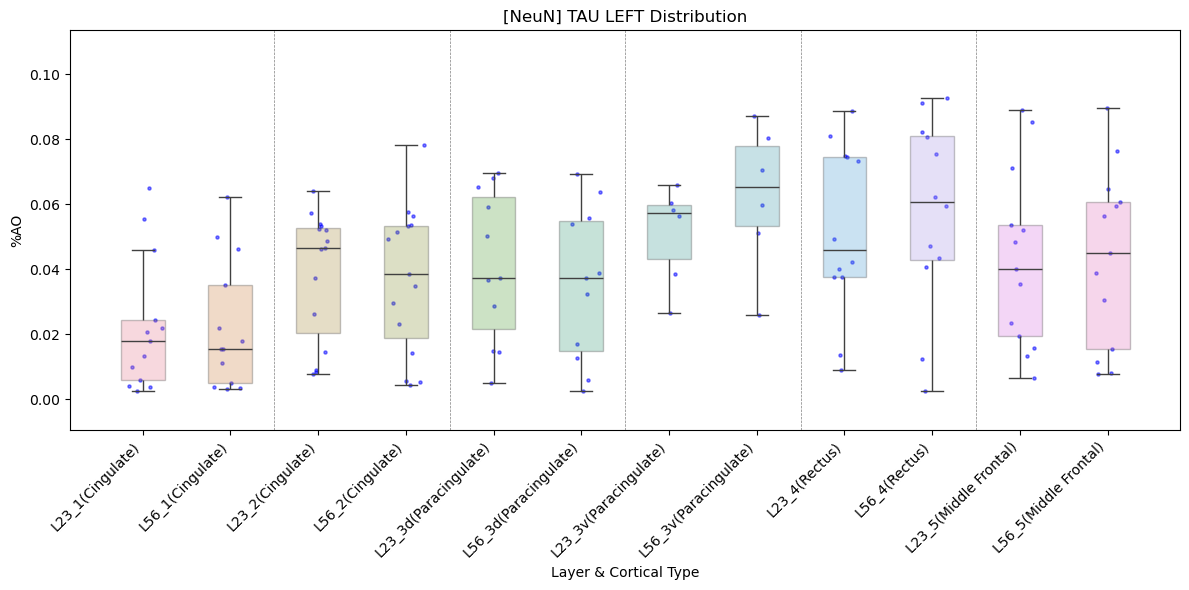

In [14]:
dist_boxplot(NeuN_Tau_L, NeuN_Labels, min_L, max_L, '[NeuN] TAU LEFT Distribution', 'Layer & Cortical Type', '%AO')

### TDP

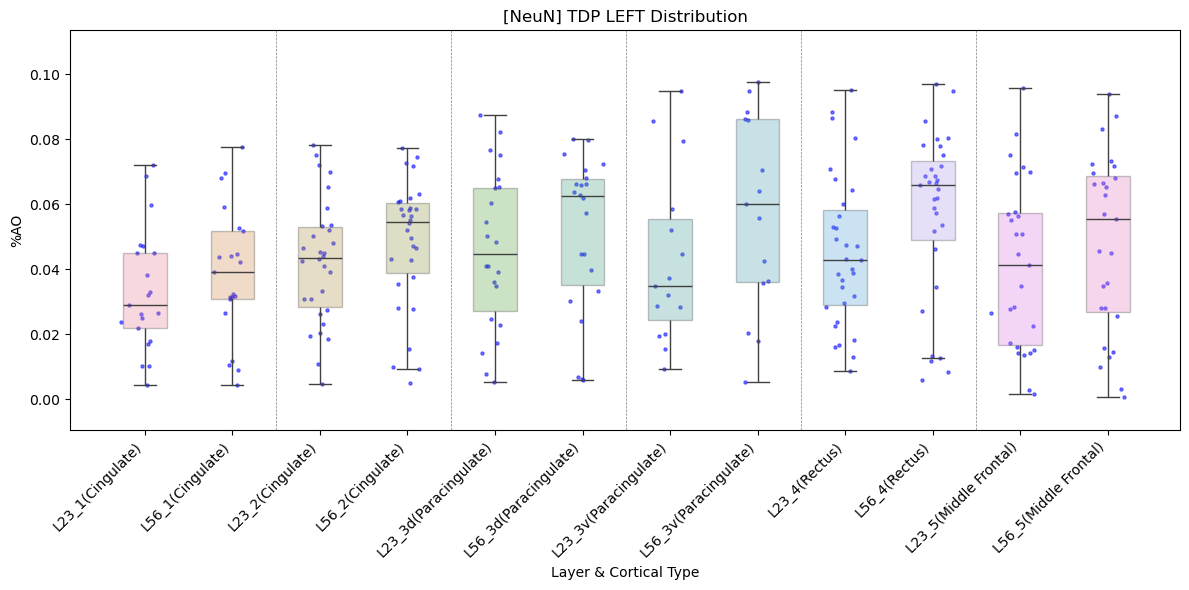

In [15]:
dist_boxplot(NeuN_TDP_L, NeuN_Labels, min_L, max_L, '[NeuN] TDP LEFT Distribution', 'Layer & Cortical Type', '%AO')

## RIGHT

### HC

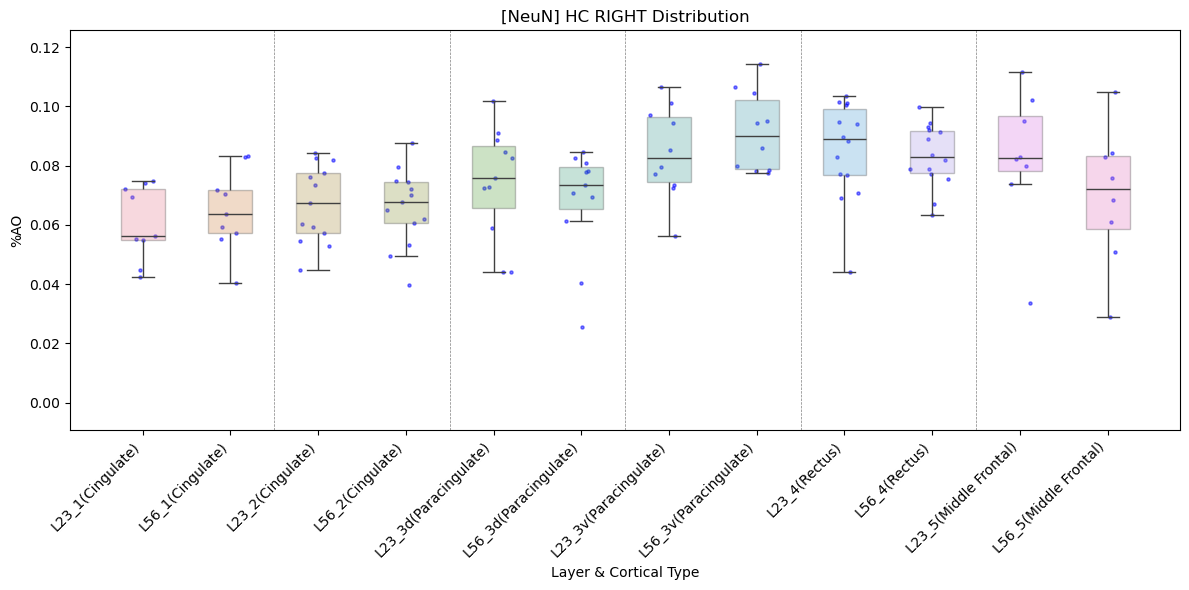

In [16]:
dist_boxplot(NeuN_HC_R, NeuN_Labels, min_R, max_R, '[NeuN] HC RIGHT Distribution', 'Layer & Cortical Type', '%AO')

### TAU

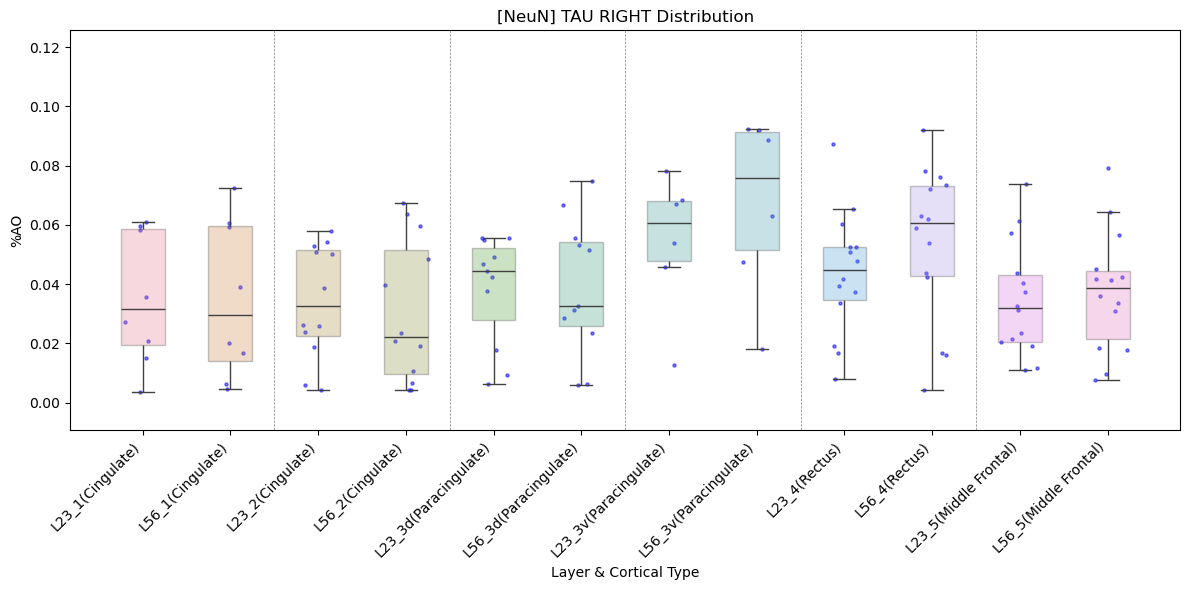

In [17]:
dist_boxplot(NeuN_Tau_R, NeuN_Labels, min_R, max_R, '[NeuN] TAU RIGHT Distribution', 'Layer & Cortical Type', '%AO')

### TDP

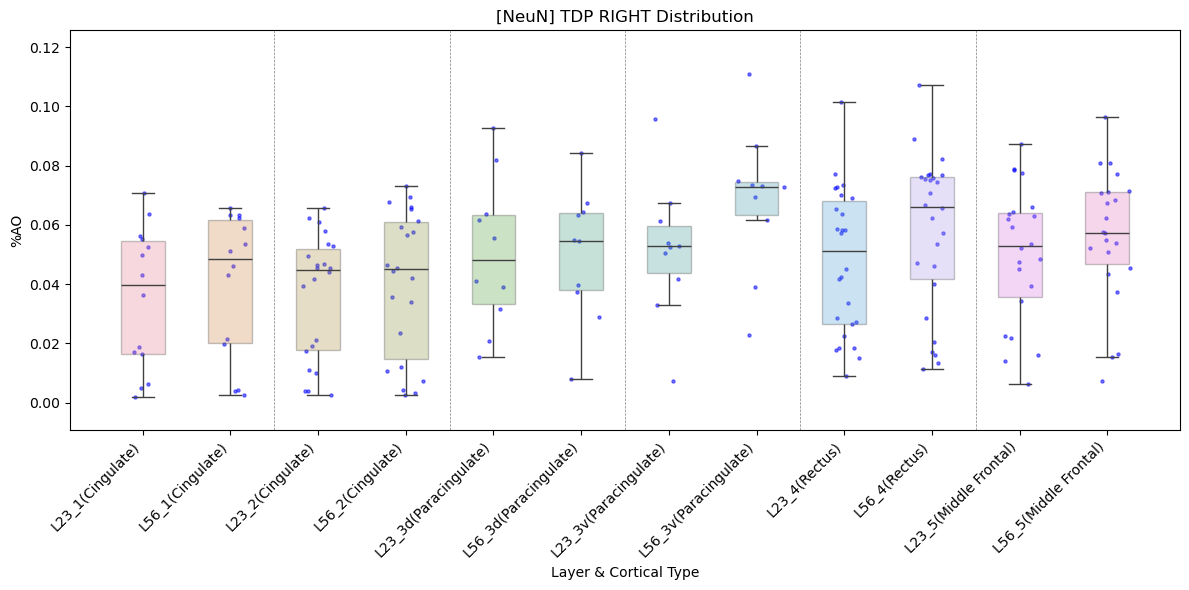

In [18]:
dist_boxplot(NeuN_TDP_R, NeuN_Labels, min_R, max_R, '[NeuN] TDP RIGHT Distribution', 'Layer & Cortical Type', '%AO')

# T-Test Between Left, Right (Before Cortical Type 3 - subdivide) + With Multiple Comparison Correction

In [19]:
def t_test_func(left_data, right_data):
    # Perform t-test for each column - No equal variance, omit NaNs, 2-sided t-test
    p_values = [stats.ttest_ind(left_data[:, i], right_data[:, i], equal_var=False, nan_policy='omit', alternative='two-sided').pvalue for i in range(left_data.shape[1])]

    # Multiple comparison correction
    # Here, using Benjamini/Hochberg procedure
    corrected_p_values = smt.multipletests(p_values, method='fdr_bh')[1]

    # Region names for output
    region_names = [
        "L23_1(Cingulate)", "L23_2(Cingulate)", "L23_3d(Paracingulate)", "L23_3v(Paracingulate)",
        "L23_4(Rectus)", "L23_5(Middle Frontal)", "L56_1(Cingulate)", "L56_2(Cingulate)",
        "L56_3d(Paracingulate)", "L56_3v(Paracingulate)", "L56_4(Rectus)", "L56_5(Middle Frontal)"
    ]

    # Output the corrected p-values
    for i, p_val in enumerate(corrected_p_values):
        difference_status = "NOT significantly different" if p_val > 0.05 else "significantly different"
        print(f"{region_names[i]:<25}: Corrected p-value = {p_val:.4f} / {difference_status}")

## HC

In [20]:
print("T-Test for HC")
t_test_func(NeuN_HC_L, NeuN_HC_R)

T-Test for HC
L23_1(Cingulate)         : Corrected p-value = 0.5240 / NOT significantly different
L23_2(Cingulate)         : Corrected p-value = 0.4341 / NOT significantly different
L23_3d(Paracingulate)    : Corrected p-value = 0.4341 / NOT significantly different
L23_3v(Paracingulate)    : Corrected p-value = 0.4341 / NOT significantly different
L23_4(Rectus)            : Corrected p-value = 0.4422 / NOT significantly different
L23_5(Middle Frontal)    : Corrected p-value = 0.4341 / NOT significantly different
L56_1(Cingulate)         : Corrected p-value = 0.4341 / NOT significantly different
L56_2(Cingulate)         : Corrected p-value = 0.7101 / NOT significantly different
L56_3d(Paracingulate)    : Corrected p-value = 0.4341 / NOT significantly different
L56_3v(Paracingulate)    : Corrected p-value = 0.4341 / NOT significantly different
L56_4(Rectus)            : Corrected p-value = 0.7101 / NOT significantly different
L56_5(Middle Frontal)    : Corrected p-value = 0.9506 / NOT si

## TAU

In [21]:
print("T-Test for TAU")
t_test_func(NeuN_Tau_L, NeuN_Tau_R)

T-Test for TAU
L23_1(Cingulate)         : Corrected p-value = 0.7810 / NOT significantly different
L23_2(Cingulate)         : Corrected p-value = 0.7810 / NOT significantly different
L23_3d(Paracingulate)    : Corrected p-value = 0.7810 / NOT significantly different
L23_3v(Paracingulate)    : Corrected p-value = 0.7810 / NOT significantly different
L23_4(Rectus)            : Corrected p-value = 0.7810 / NOT significantly different
L23_5(Middle Frontal)    : Corrected p-value = 0.7810 / NOT significantly different
L56_1(Cingulate)         : Corrected p-value = 0.7810 / NOT significantly different
L56_2(Cingulate)         : Corrected p-value = 0.7810 / NOT significantly different
L56_3d(Paracingulate)    : Corrected p-value = 0.7810 / NOT significantly different
L56_3v(Paracingulate)    : Corrected p-value = 0.7810 / NOT significantly different
L56_4(Rectus)            : Corrected p-value = 0.7810 / NOT significantly different
L56_5(Middle Frontal)    : Corrected p-value = 0.7810 / NOT s

## TDP

In [22]:
print("T-Test for TDP")
t_test_func(NeuN_TDP_L, NeuN_TDP_R)

T-Test for TDP
L23_1(Cingulate)         : Corrected p-value = 0.9780 / NOT significantly different
L23_2(Cingulate)         : Corrected p-value = 0.7584 / NOT significantly different
L23_3d(Paracingulate)    : Corrected p-value = 0.9780 / NOT significantly different
L23_3v(Paracingulate)    : Corrected p-value = 0.7584 / NOT significantly different
L23_4(Rectus)            : Corrected p-value = 0.9780 / NOT significantly different
L23_5(Middle Frontal)    : Corrected p-value = 0.7584 / NOT significantly different
L56_1(Cingulate)         : Corrected p-value = 0.9780 / NOT significantly different
L56_2(Cingulate)         : Corrected p-value = 0.7584 / NOT significantly different
L56_3d(Paracingulate)    : Corrected p-value = 0.9780 / NOT significantly different
L56_3v(Paracingulate)    : Corrected p-value = 0.7584 / NOT significantly different
L56_4(Rectus)            : Corrected p-value = 0.9780 / NOT significantly different
L56_5(Middle Frontal)    : Corrected p-value = 0.7584 / NOT s

# Box/Scatter Plot of HC, Tau, TDP [NeuN] - W Score

In [23]:
# min max
all_values = np.concatenate([NeuN_HC_w.flatten(), NeuN_Tau_w.flatten(), NeuN_TDP_w.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_LR = min_val - buffer
max_LR = max_val + buffer


# min max
all_values = np.concatenate([NeuN_HC_w_L.flatten(), NeuN_Tau_w_L.flatten(), NeuN_TDP_w_L.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_L = min_val - buffer
max_L = max_val + buffer

# min max
all_values = np.concatenate([NeuN_HC_w_R.flatten(), NeuN_Tau_w_R.flatten(), NeuN_TDP_w_R.flatten()])
min_val = np.nanmin(all_values)
max_val = np.nanmax(all_values)
buffer = (max_val-min_val) * 0.1

min_R = min_val - buffer
max_R = max_val + buffer

## L+R Mean

### HC

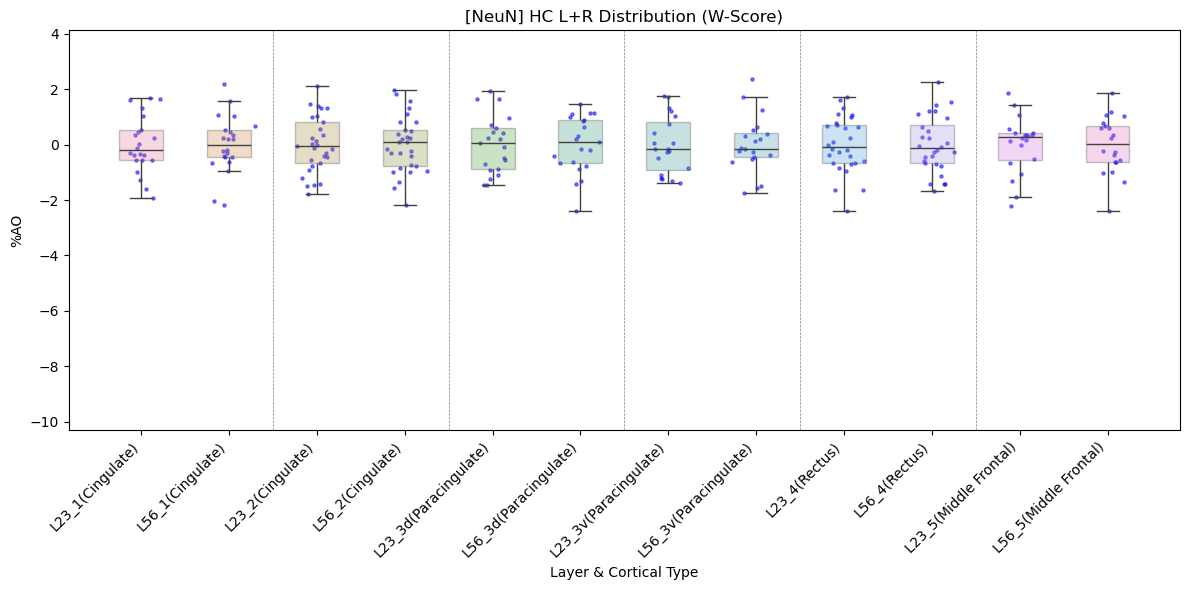

In [24]:
dist_boxplot(NeuN_HC_w, NeuN_Labels, min_LR, max_LR, '[NeuN] HC L+R Distribution (W-Score)', 'Layer & Cortical Type', '%AO')

### TAU

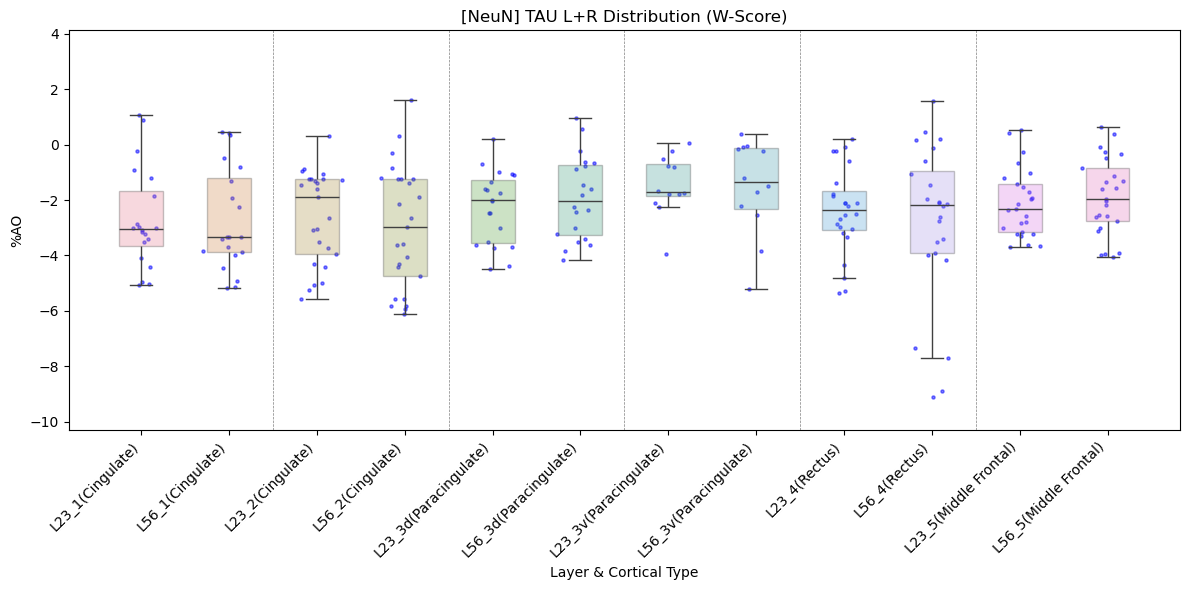

In [25]:
dist_boxplot(NeuN_Tau_w, NeuN_Labels, min_LR, max_LR, '[NeuN] TAU L+R Distribution (W-Score)', 'Layer & Cortical Type', '%AO')

### TDP

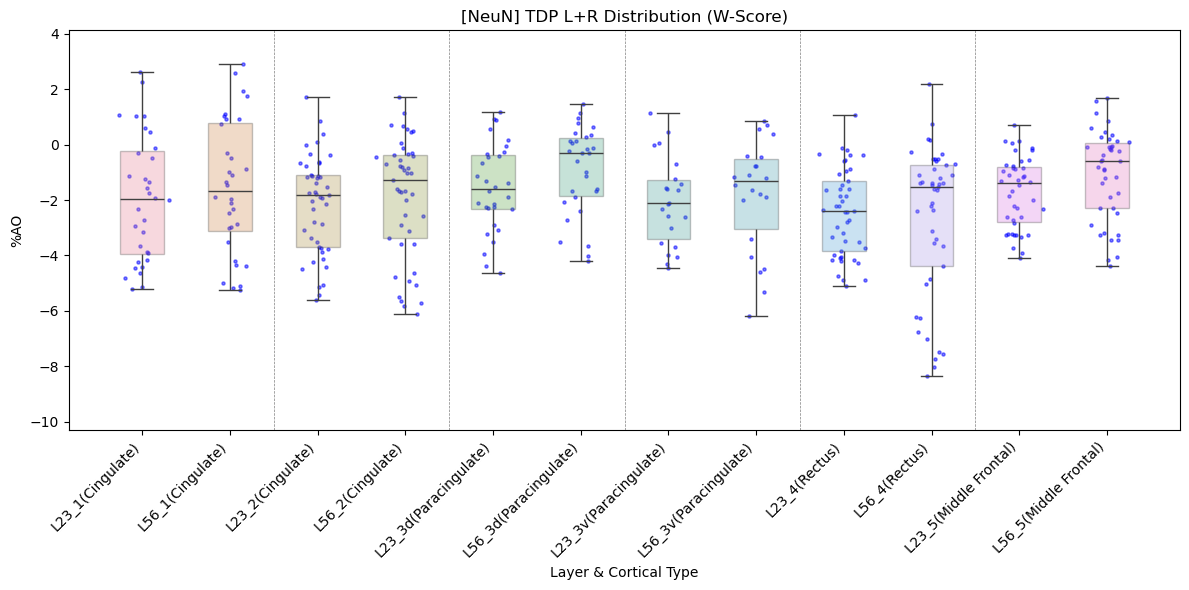

In [26]:
dist_boxplot(NeuN_TDP_w, NeuN_Labels, min_LR, max_LR, '[NeuN] TDP L+R Distribution (W-Score)', 'Layer & Cortical Type', '%AO')

## LEFT

### HC

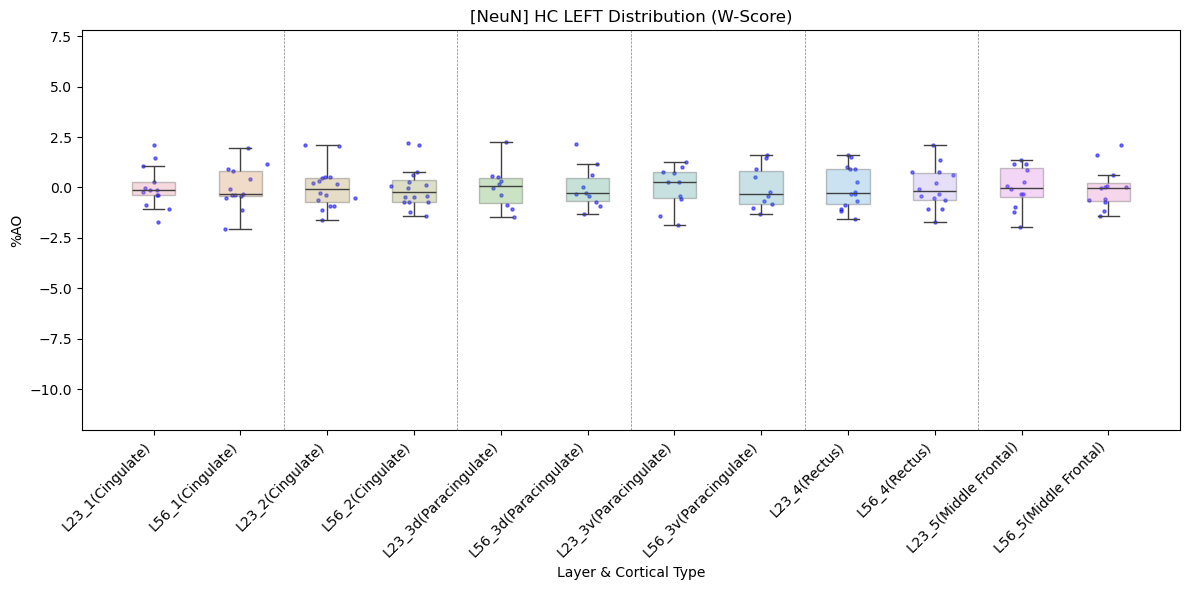

In [27]:
dist_boxplot(NeuN_HC_w_L, NeuN_Labels, min_L, max_L, '[NeuN] HC LEFT Distribution (W-Score)', 'Layer & Cortical Type', '%AO')

### TAU

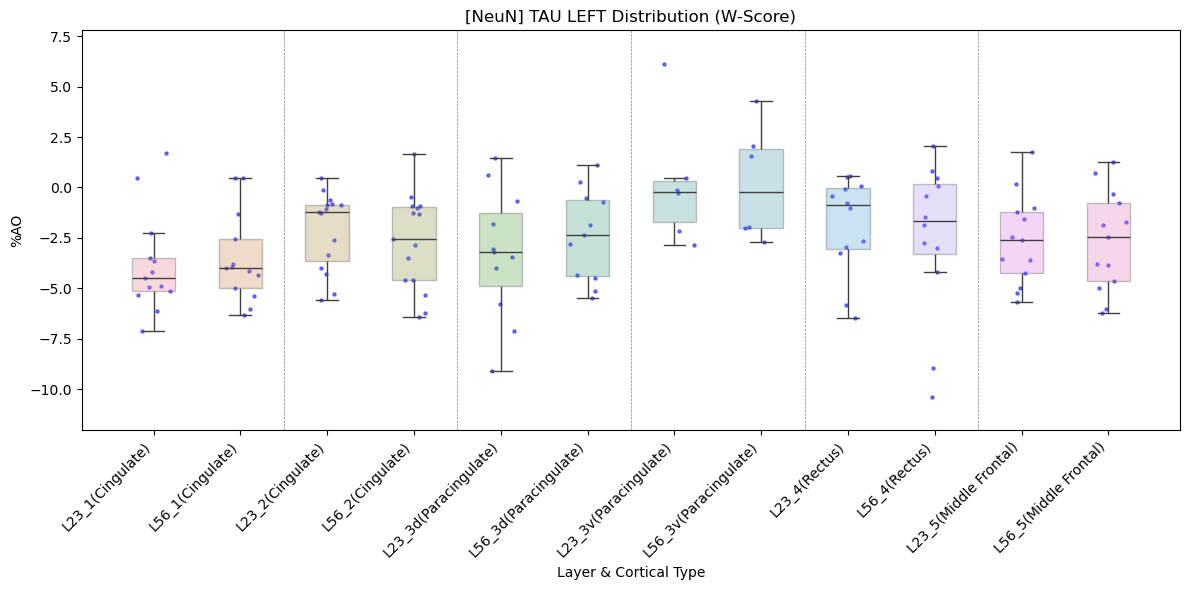

In [28]:
dist_boxplot(NeuN_Tau_w_L, NeuN_Labels, min_L, max_L, '[NeuN] TAU LEFT Distribution (W-Score)', 'Layer & Cortical Type', '%AO')

### TDP

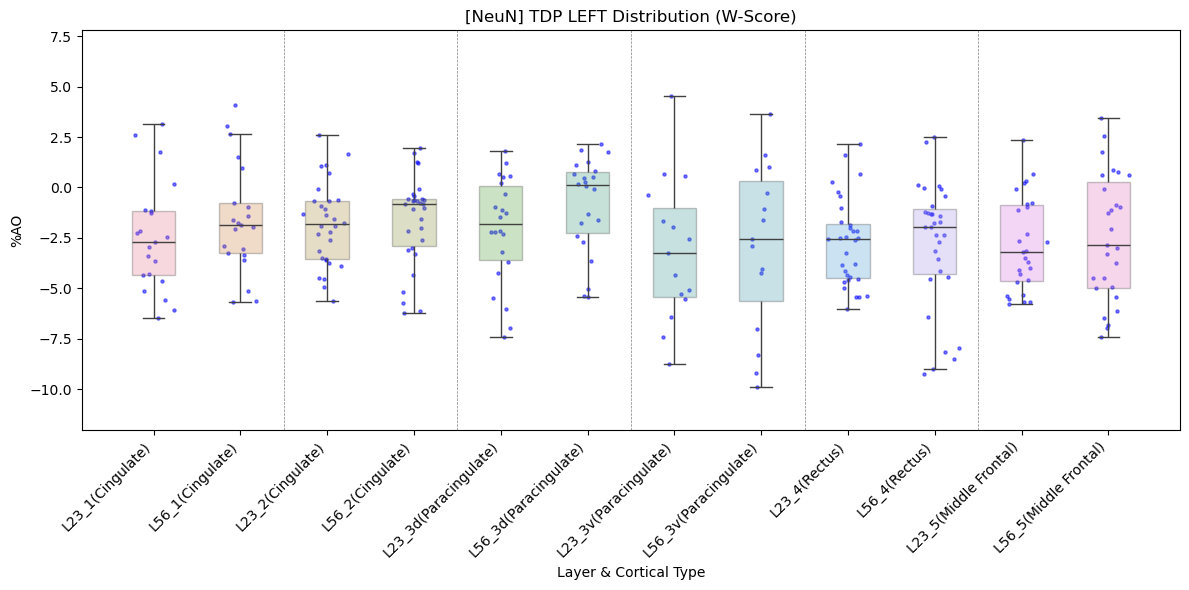

In [29]:
dist_boxplot(NeuN_TDP_w_L, NeuN_Labels, min_L, max_L, '[NeuN] TDP LEFT Distribution (W-Score)', 'Layer & Cortical Type', '%AO')

## RIGHT

### HC

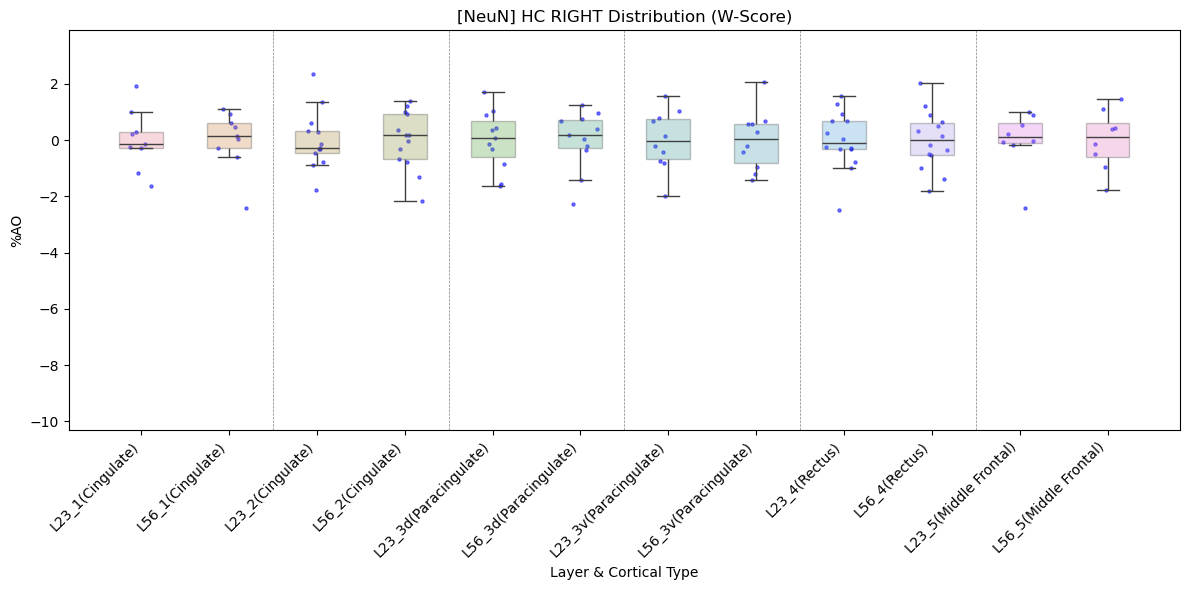

In [30]:
dist_boxplot(NeuN_HC_w_R, NeuN_Labels, min_R, max_R, '[NeuN] HC RIGHT Distribution (W-Score)', 'Layer & Cortical Type', '%AO')

### TAU

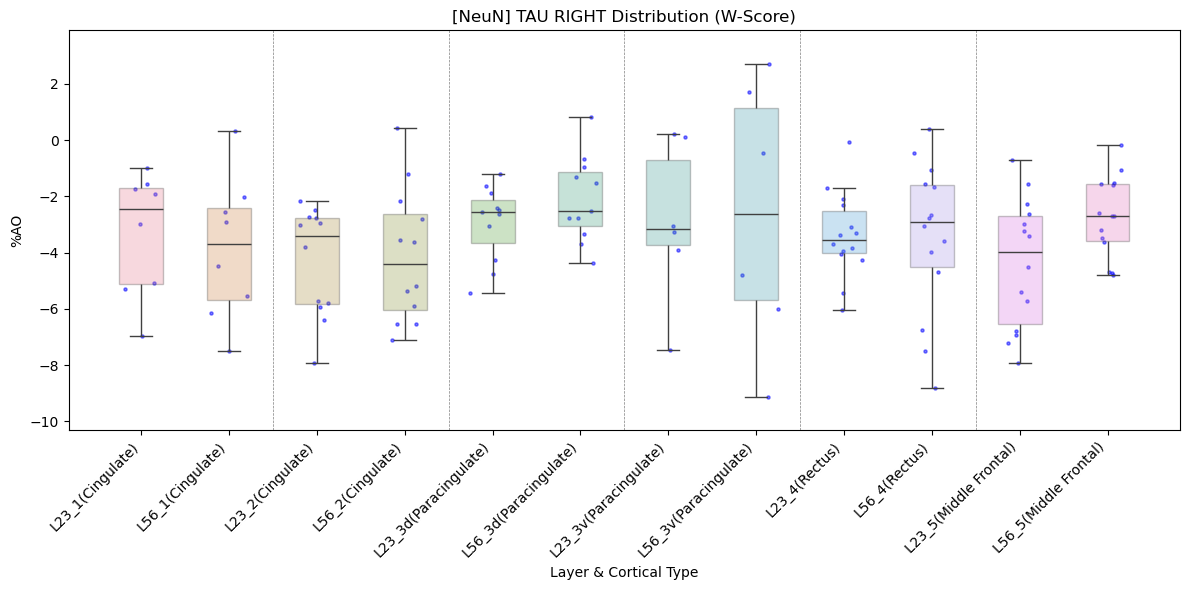

In [31]:
dist_boxplot(NeuN_Tau_w_R, NeuN_Labels, min_R, max_R, '[NeuN] TAU RIGHT Distribution (W-Score)', 'Layer & Cortical Type', '%AO')

### TDP

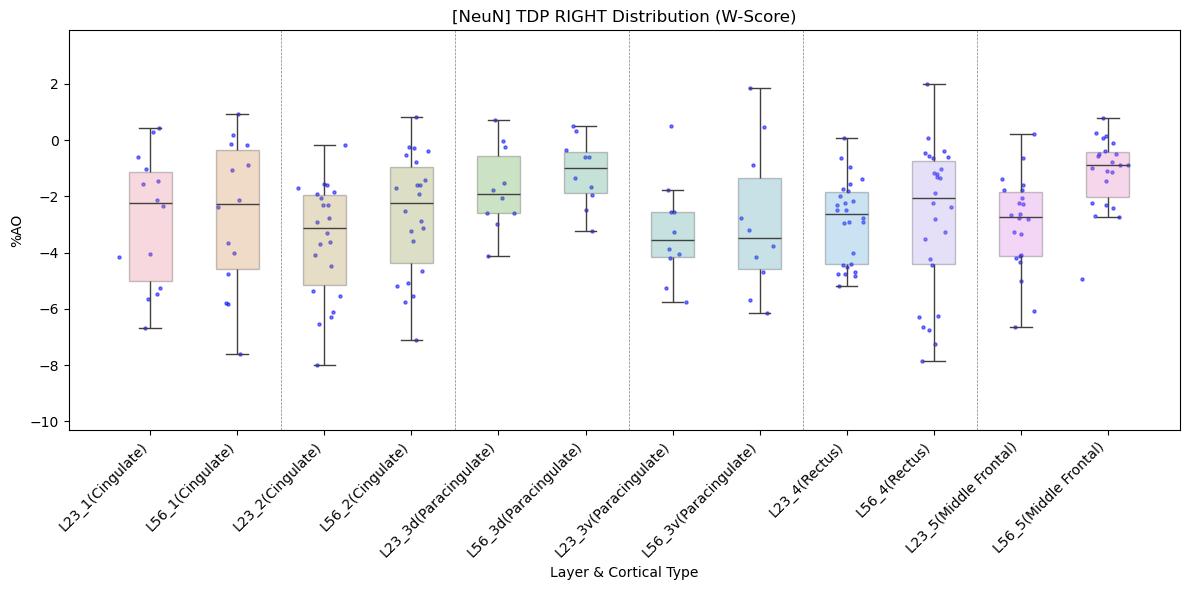

In [32]:
dist_boxplot(NeuN_TDP_w_R, NeuN_Labels, min_R, max_R, '[NeuN] TDP RIGHT Distribution (W-Score)', 'Layer & Cortical Type', '%AO')

# T-Test Between Left, Right (Before Cortical Type 3 - subdivide) + With Multiple Comparison Correction

## HC

In [33]:
print("T-Test for HC W-Score")
t_test_func(NeuN_HC_w_L, NeuN_HC_w_R)

T-Test for HC W-Score
L23_1(Cingulate)         : Corrected p-value = 1.0000 / NOT significantly different
L23_2(Cingulate)         : Corrected p-value = 1.0000 / NOT significantly different
L23_3d(Paracingulate)    : Corrected p-value = 1.0000 / NOT significantly different
L23_3v(Paracingulate)    : Corrected p-value = 1.0000 / NOT significantly different
L23_4(Rectus)            : Corrected p-value = 1.0000 / NOT significantly different
L23_5(Middle Frontal)    : Corrected p-value = 1.0000 / NOT significantly different
L56_1(Cingulate)         : Corrected p-value = 1.0000 / NOT significantly different
L56_2(Cingulate)         : Corrected p-value = 1.0000 / NOT significantly different
L56_3d(Paracingulate)    : Corrected p-value = 1.0000 / NOT significantly different
L56_3v(Paracingulate)    : Corrected p-value = 1.0000 / NOT significantly different
L56_4(Rectus)            : Corrected p-value = 1.0000 / NOT significantly different
L56_5(Middle Frontal)    : Corrected p-value = 1.0000 

## TAU

In [34]:
print("T-Test for TAU W-Score")
t_test_func(NeuN_Tau_w_L, NeuN_Tau_w_R)

T-Test for TAU W-Score
L23_1(Cingulate)         : Corrected p-value = 0.8355 / NOT significantly different
L23_2(Cingulate)         : Corrected p-value = 0.0831 / NOT significantly different
L23_3d(Paracingulate)    : Corrected p-value = 0.8355 / NOT significantly different
L23_3v(Paracingulate)    : Corrected p-value = 0.3059 / NOT significantly different
L23_4(Rectus)            : Corrected p-value = 0.3025 / NOT significantly different
L23_5(Middle Frontal)    : Corrected p-value = 0.3025 / NOT significantly different
L56_1(Cingulate)         : Corrected p-value = 0.8355 / NOT significantly different
L56_2(Cingulate)         : Corrected p-value = 0.3059 / NOT significantly different
L56_3d(Paracingulate)    : Corrected p-value = 0.8355 / NOT significantly different
L56_3v(Paracingulate)    : Corrected p-value = 0.4710 / NOT significantly different
L56_4(Rectus)            : Corrected p-value = 0.8006 / NOT significantly different
L56_5(Middle Frontal)    : Corrected p-value = 0.9218

## TDP

In [35]:
print("T-Test for TDP W-Score")
t_test_func(NeuN_TDP_w_L, NeuN_TDP_w_R)

T-Test for TDP W-Score
L23_1(Cingulate)         : Corrected p-value = 0.9835 / NOT significantly different
L23_2(Cingulate)         : Corrected p-value = 0.0500 / significantly different
L23_3d(Paracingulate)    : Corrected p-value = 0.9835 / NOT significantly different
L23_3v(Paracingulate)    : Corrected p-value = 0.9835 / NOT significantly different
L23_4(Rectus)            : Corrected p-value = 0.9835 / NOT significantly different
L23_5(Middle Frontal)    : Corrected p-value = 0.9835 / NOT significantly different
L56_1(Cingulate)         : Corrected p-value = 0.7201 / NOT significantly different
L56_2(Cingulate)         : Corrected p-value = 0.3757 / NOT significantly different
L56_3d(Paracingulate)    : Corrected p-value = 0.9835 / NOT significantly different
L56_3v(Paracingulate)    : Corrected p-value = 0.9835 / NOT significantly different
L56_4(Rectus)            : Corrected p-value = 0.9835 / NOT significantly different
L56_5(Middle Frontal)    : Corrected p-value = 0.3341 / N